In [1]:
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import toml
import numpy as np
import scipy

plt.rcParams['figure.figsize'] = 4.5, 3
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
sns.set_theme(style="white")

saving = False

In [2]:
def load_job_id(job_id: int):
    directory = os.path.join(os.getcwd(), f'{job_id}')
    cf = toml.load(os.path.join(directory, 'config.toml'))
    df = pd.read_csv(os.path.join(directory, 'results.csv'))

    print(
        cf['model']['name'], 
        cf['timing'])

    return df, cf

def clock_speed_comp(df: pd.DataFrame):
    df_opt = df.loc[df.groupby('clock_speed')["p99"].idxmin()]
    # df_wcet = df.loc[df.groupby('clock_speed')["hit_chance"].idxmax()]
    # df_opt = df
    sns.lineplot(
        data=df_opt.loc[df_opt['p99'] <= 10],
        x='clock_speed',
        y='p99',
        label='Optimal'
    )
    sns.lineplot(
        data=df.loc[(df['hit_chance'] >= 0.999)],
        x='clock_speed',
        y='p99',
        label='99.9% hit chance',
    ).set(
        xlabel='Clock Speed',
        ylabel='.99 Quantile of Safety Property D',
    )

CC {'path': 'data/huffbench.json', 'clock_low': 100000, 'clock_high': 8000001, 'clock_step': 100000, 'period_low': 0.005, 'period_high': 1.0, 'period_step': 0.001}


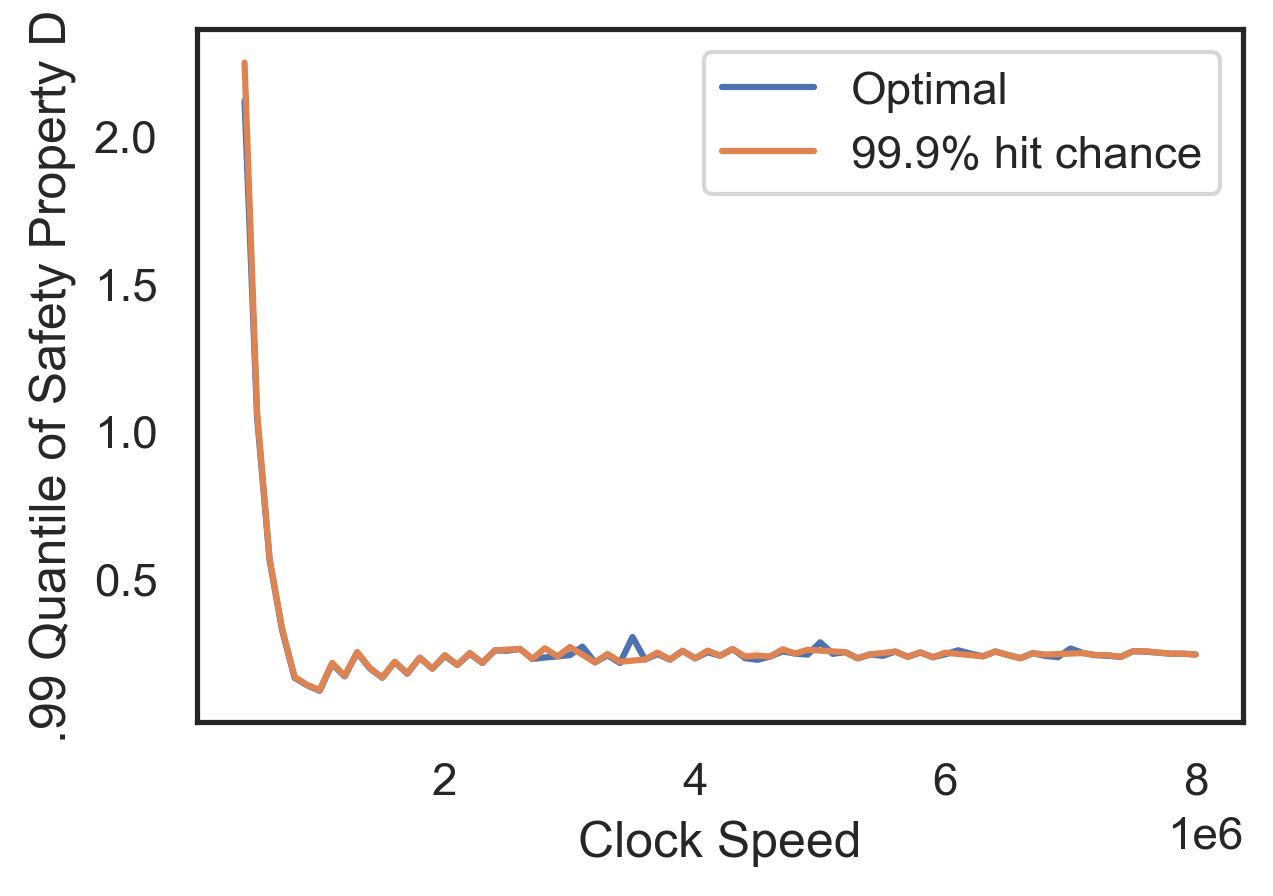

In [3]:
df, cf = load_job_id('clock_speeds_20241111_0329')
clock_speed_comp(df)

F1 {'path': 'data/picojpeg-emnist.json', 'clock_low': 100000, 'clock_high': 8000001, 'clock_step': 100000, 'period_low': 0.005, 'period_high': 0.4, 'period_step': 0.001}


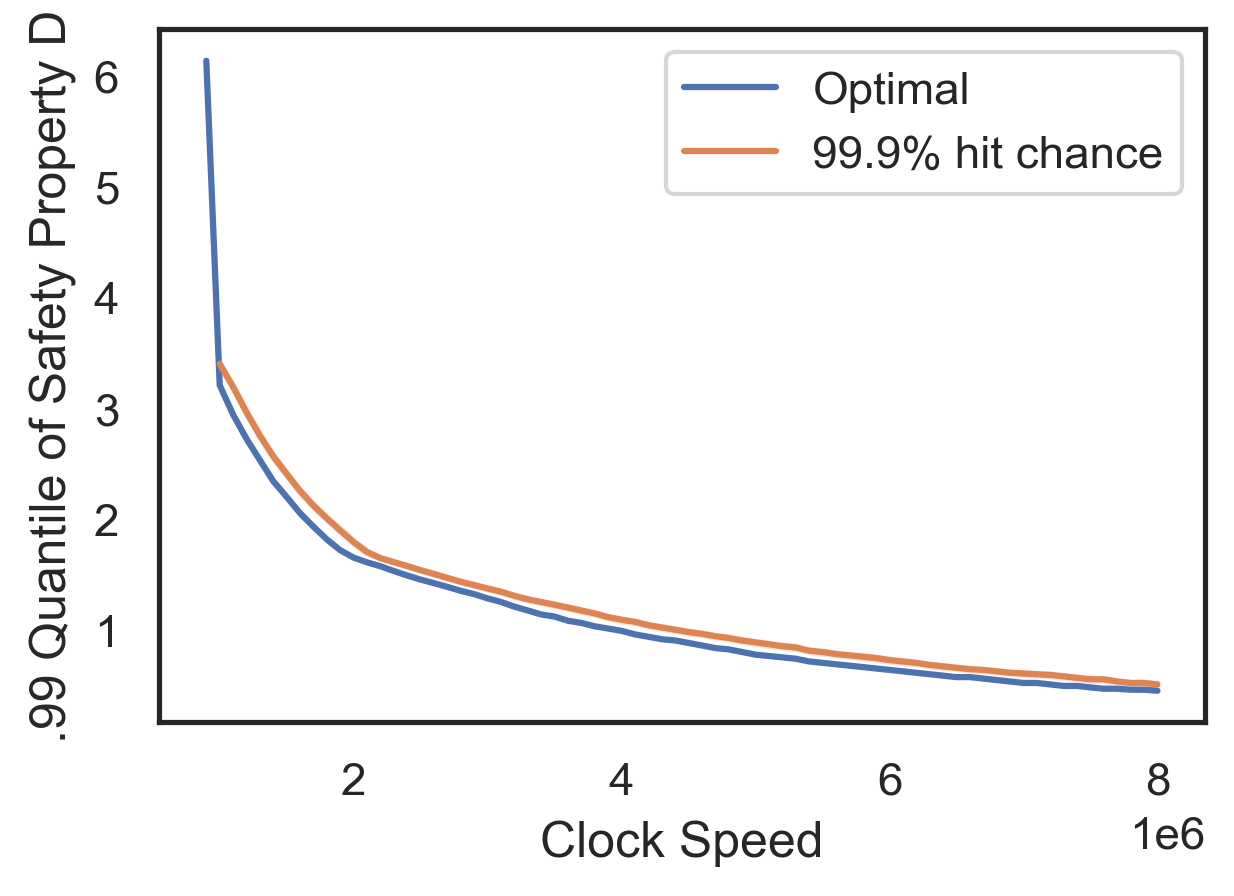

In [4]:
df, cf = load_job_id('clock_speeds_20241111_0631')
clock_speed_comp(df)

F1 {'mode': 'measurement', 'clock_scale_low': 8.0, 'clock_scale_high': 20.0, 'clock_scale_step': 0.5, 'periods': [0.015, 0.018, 0.02, 0.022, 0.025, 0.028, 0.03, 0.04, 0.05, 0.06], 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 1000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


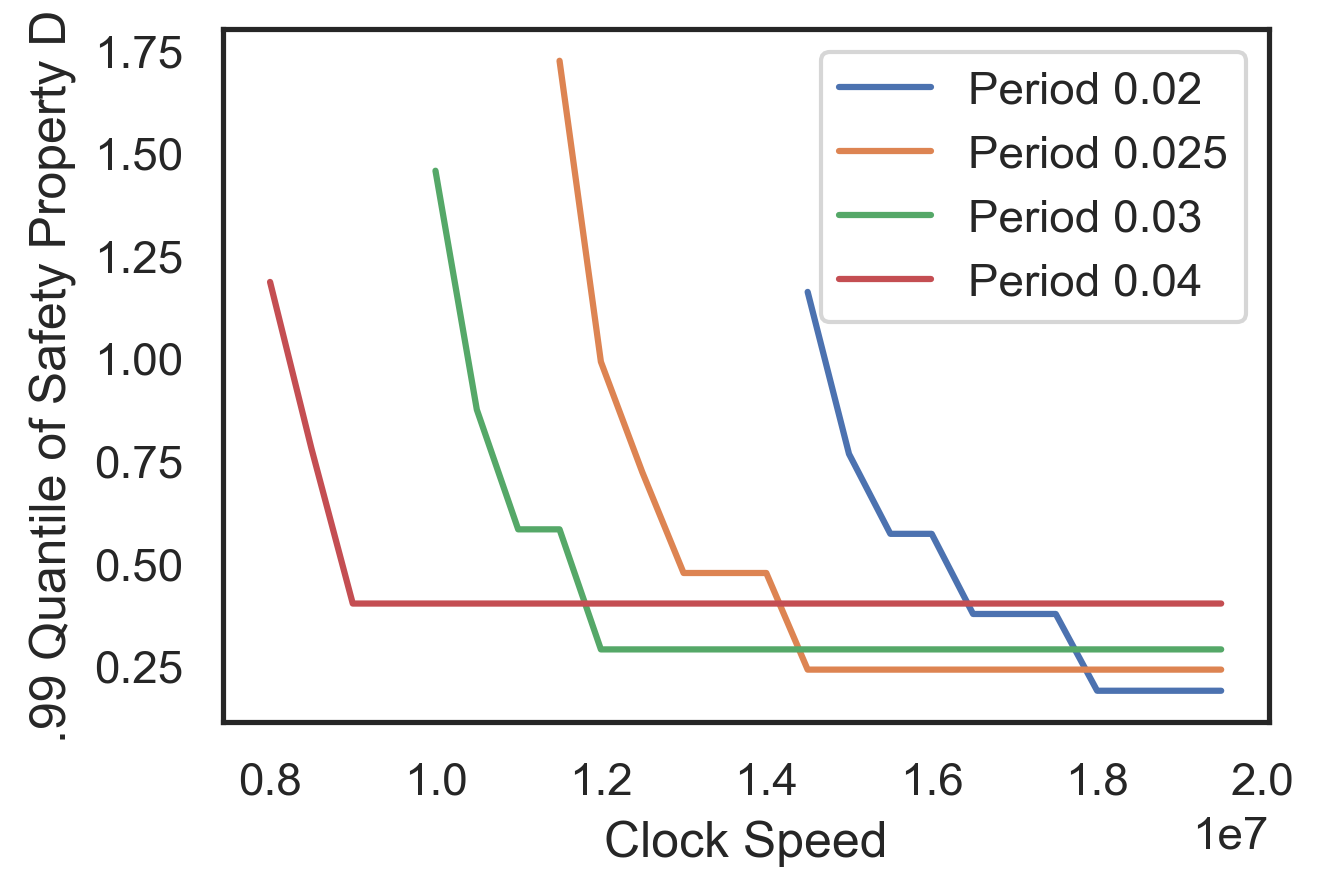

In [5]:
df, cf = load_job_id('fixed_period_20241113_1639')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale']
df = df.loc[df['p99'] <= 2]

periods = [0.02, 0.025, 0.03, 0.04]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    sns.lineplot(
        data=df1,
        x='clock_speed',
        y='p99',
        label=f'Period {p}'
    )
plt.xlabel('Clock Speed')
plt.ylabel('.99 Quantile of Safety Property D')
plt.show()

F1 {'mode': 'measurement', 'clock_scale_low': 4.0, 'clock_scale_high': 18.0, 'clock_scale_step': 0.2, 'periods': [0.03, 0.04], 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 1000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


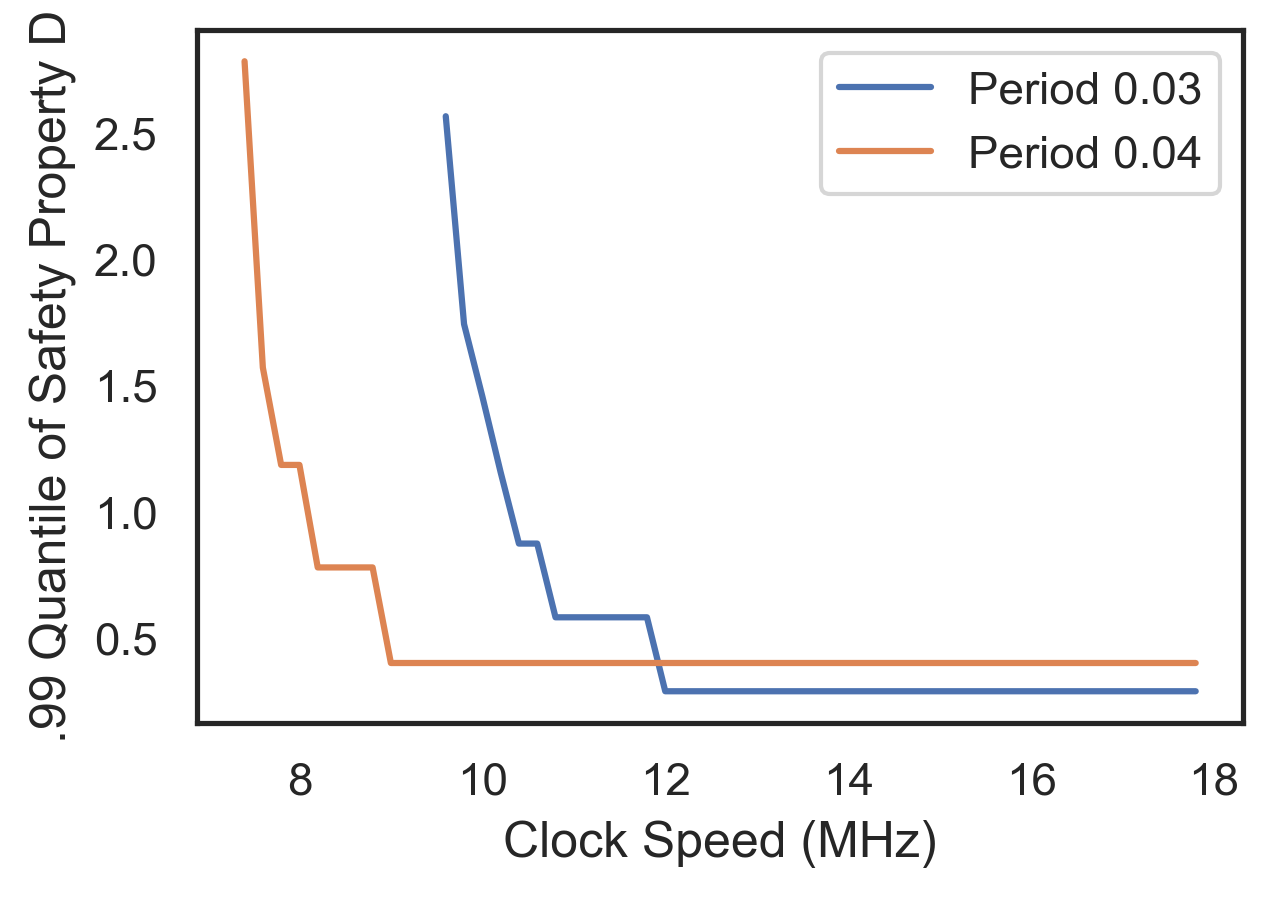

In [6]:
df, cf = load_job_id('fixed_period_20241114_1010')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[(df['p99'] <= 10) & (df['clock_speed'] <= 2e7)]
df = df.loc[df['p99'] <= 4]

periods = [0.03, 0.04]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    sns.lineplot(
        data=df1,
        x='clock_speed',
        y='p99',
        label=f'Period {p}'
    )
plt.xlabel('Clock Speed (MHz)')
plt.ylabel('.99 Quantile of Safety Property D')
plt.show()

In [7]:
df3 = df.loc[df['period'] == 0.03]
df4 = df.loc[df['period'] == 0.04]
df3.join(df4.set_index('clock_speed'), rsuffix='_04', on='clock_speed', how='inner')

,clock_scale,hit_chance,period,p99,p99_lower,p99_upper,clock_speed,clock_scale_04,hit_chance_04,period_04,p99_04,p99_lower_04,p99_upper_04
29,9.6,0.596116,0.03,2.566027,2.509483,2.614038,9.6,9.6,0.99922,0.04,0.401898,0.401898,0.401898
31,9.8,0.666337,0.03,1.743288,1.586872,1.743288,9.8,9.8,0.99968,0.04,0.401898,0.401898,0.401898
33,10.0,0.730197,0.03,1.457048,1.455790,1.457048,10.0,10.0,0.99987,0.04,0.401898,0.401898,0.401898
35,10.2,0.788168,0.03,1.157025,1.157025,1.157025,10.2,10.2,0.99994,0.04,0.401898,0.401898,0.401898
37,10.4,0.837748,0.03,0.874597,0.874597,0.874597,10.4,10.4,0.99997,0.04,0.401898,0.401898,0.401898
39,10.6,0.878899,0.03,0.874597,0.874597,0.874597,10.6,10.6,1.00000,0.04,0.401898,0.401898,0.401898
41,10.8,0.911839,0.03,0.582790,0.582790,0.582790,10.8,10.8,1.00000,0.04,0.401898,0.401898,0.401898
43,11.0,0.937809,0.03,0.582790,0.582790,0.582790,11.0,11.0,1.00000,0.04,0.401898,0.401898,0.401898
45,11.2,0.956640,0.03,0.582790,0.582790,0.582790,11.2,11.2,1.00000,0.04,0.401898,0.401898,0.401898
47,11.4,0.971210,0.03,0.582790,0.582790,0.582790,11.4,11.4,1.00000,0.04,0.401898,0.401898,0.401898


F1 {'mode': 'synthetic', 'clock_scale_low': 0.1, 'clock_scale_high': 2.0, 'clock_scale_step': 0.025, 'periods': [0.01, 0.015, 0.02, 0.025, 0.03, 0.04], 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


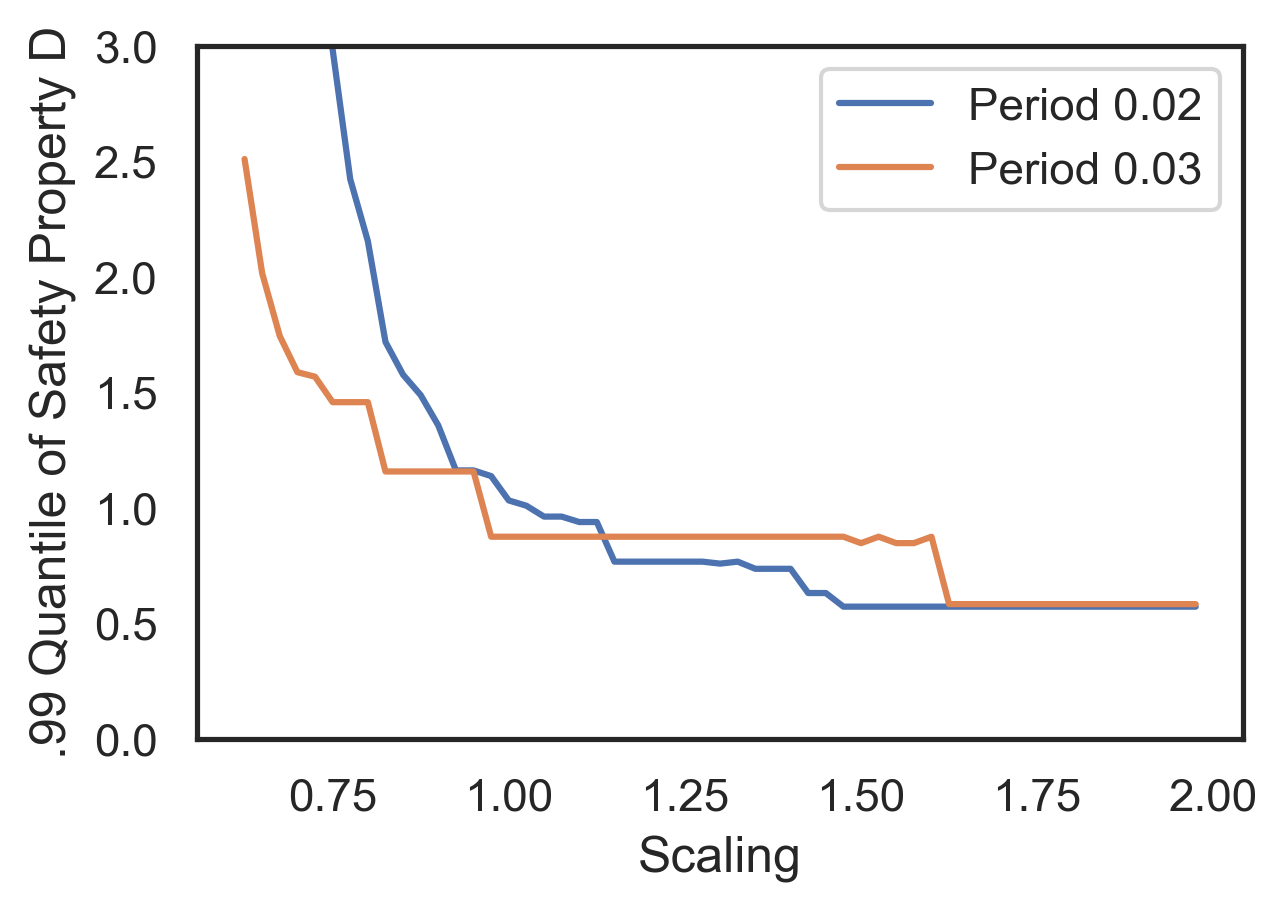

In [8]:
df, cf = load_job_id('fixed_period_20241114_1436')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
df = df.loc[df['clock_speed'] >= 6]

periods = [0.02, 0.03]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    sns.lineplot(
        data=df1,
        x='clock_scale',
        y='p99',
        label=f'Period {p}'
    )
plt.ylim(0, 3)
plt.xlabel('Scaling')
plt.ylabel('.99 Quantile of Safety Property D')
plt.show()

CS {'mode': 'synthetic', 'clock_scale_low': 0.1, 'clock_scale_high': 2.0, 'clock_scale_step': 0.05, 'periods': [0.01, 0.015, 0.02, 0.03, 0.04], 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


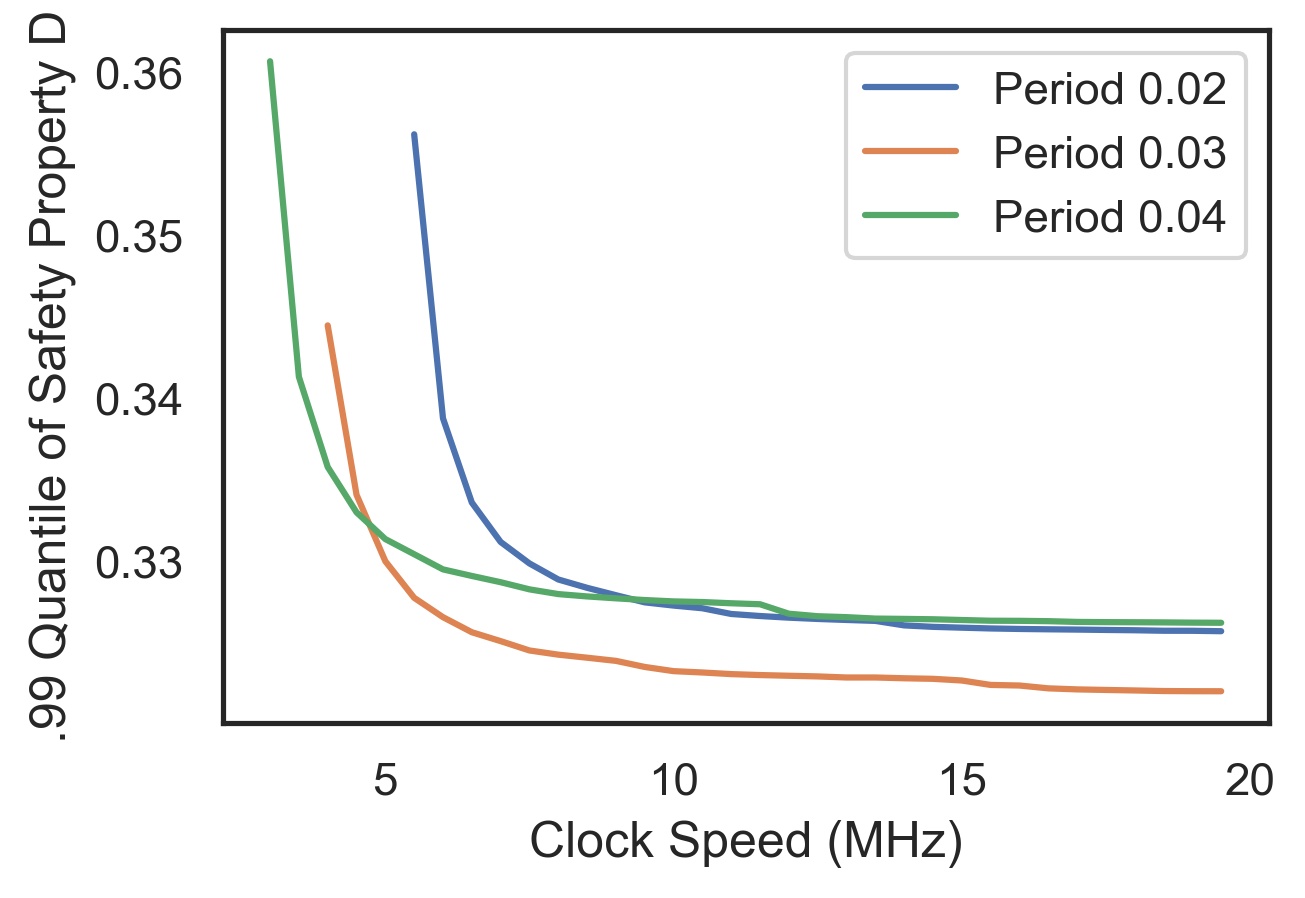

In [9]:
df, cf = load_job_id('fixed_period_20241114_1452')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[df['clock_speed'] >= 6]

periods = [0.02, 0.03, 0.04]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    sns.lineplot(
        data=df1,
        x='clock_speed',
        y='p99',
        label=f'Period {p}'
    )
plt.xlabel('Clock Speed (MHz)')
plt.ylabel('.99 Quantile of Safety Property D')
plt.show()

EW {'mode': 'synthetic', 'clock_scale_low': 0.1, 'clock_scale_high': 3.0, 'clock_scale_step': 0.05, 'periods': [0.001, 0.0015, 0.002, 0.003, 0.004], 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.0005}, 'normal': {'mean': 0.01, 'std': 0.01}}}


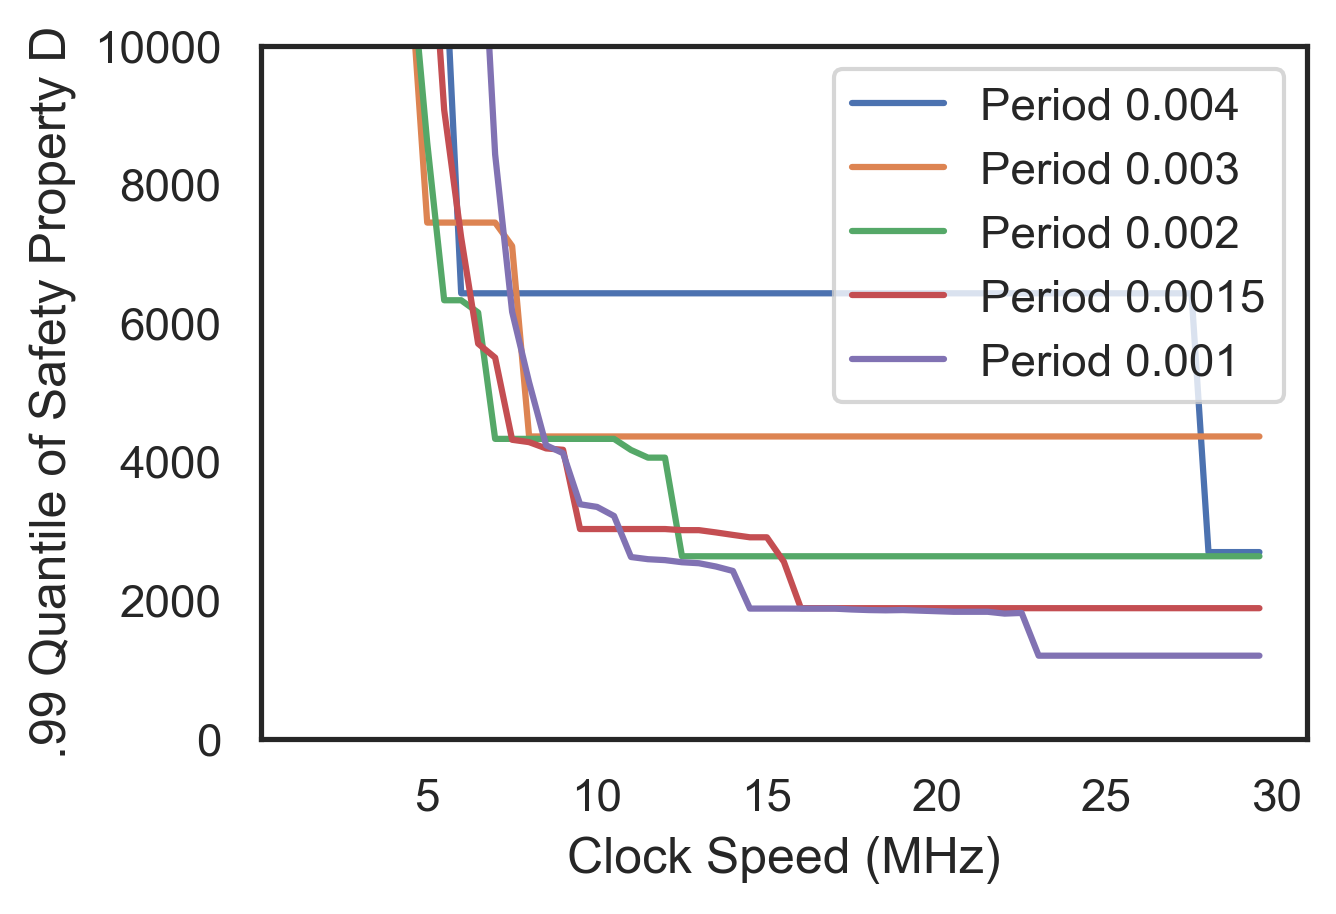

In [10]:
df, cf = load_job_id('fixed_period_20241114_1509')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[df['clock_speed'] >= 6]

periods = set(df['period'])

# periods = [0.0015, 0.003]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    sns.lineplot(
        data=df1,
        x='clock_speed',
        y='p99',
        label=f'Period {p}'
    )
plt.ylim(0, 10000)
plt.xlabel('Clock Speed (MHz)')
plt.ylabel('.99 Quantile of Safety Property D')
plt.show()

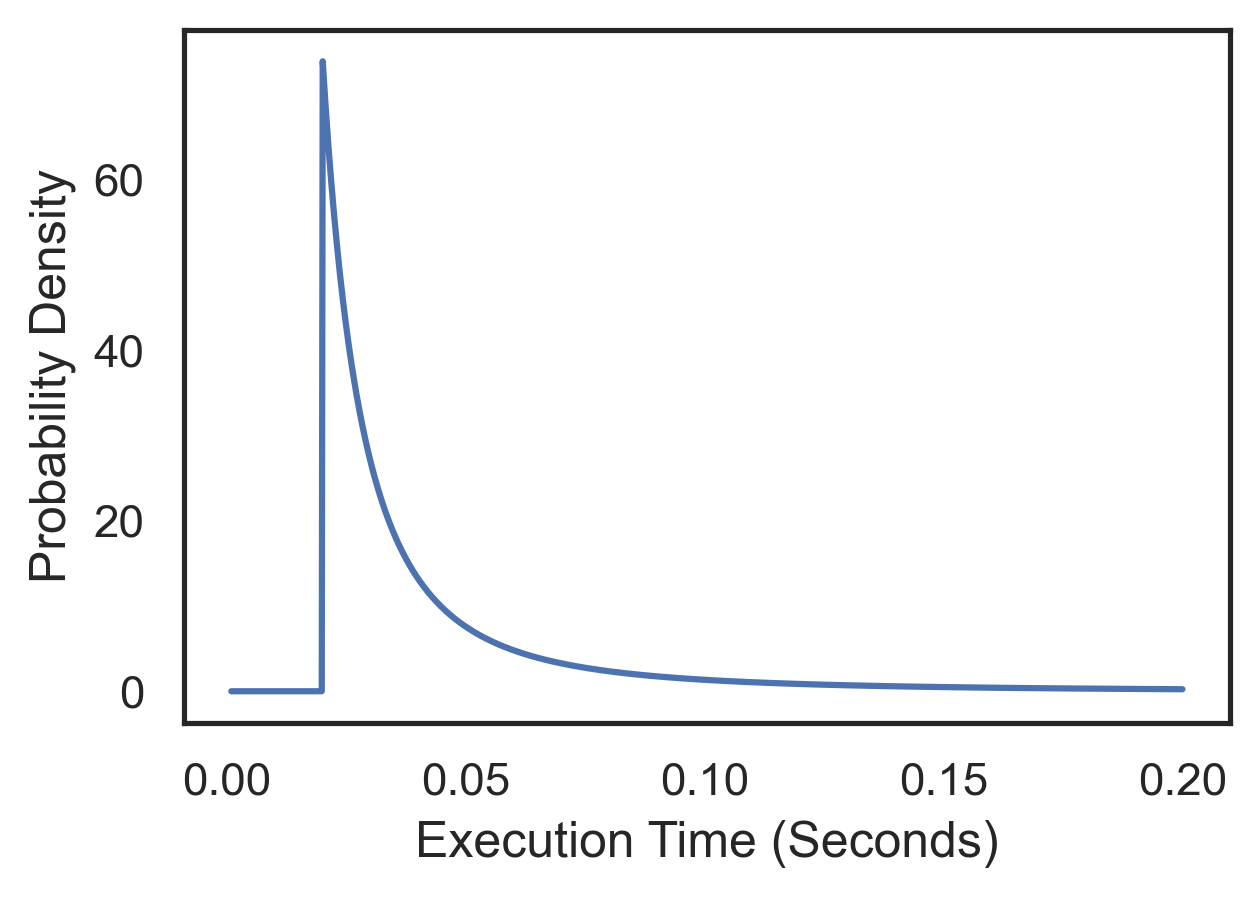

In [11]:
x = np.linspace(0.001, 0.2, 1000)
plt.plot(x, scipy.stats.pareto.pdf(x, 1.5, scale=0.02))
plt.xlabel('Execution Time (Seconds)')
plt.ylabel('Probability Density')
if saving:
    plt.savefig('pareto.pdf', bbox_inches = "tight")
plt.show()

99999


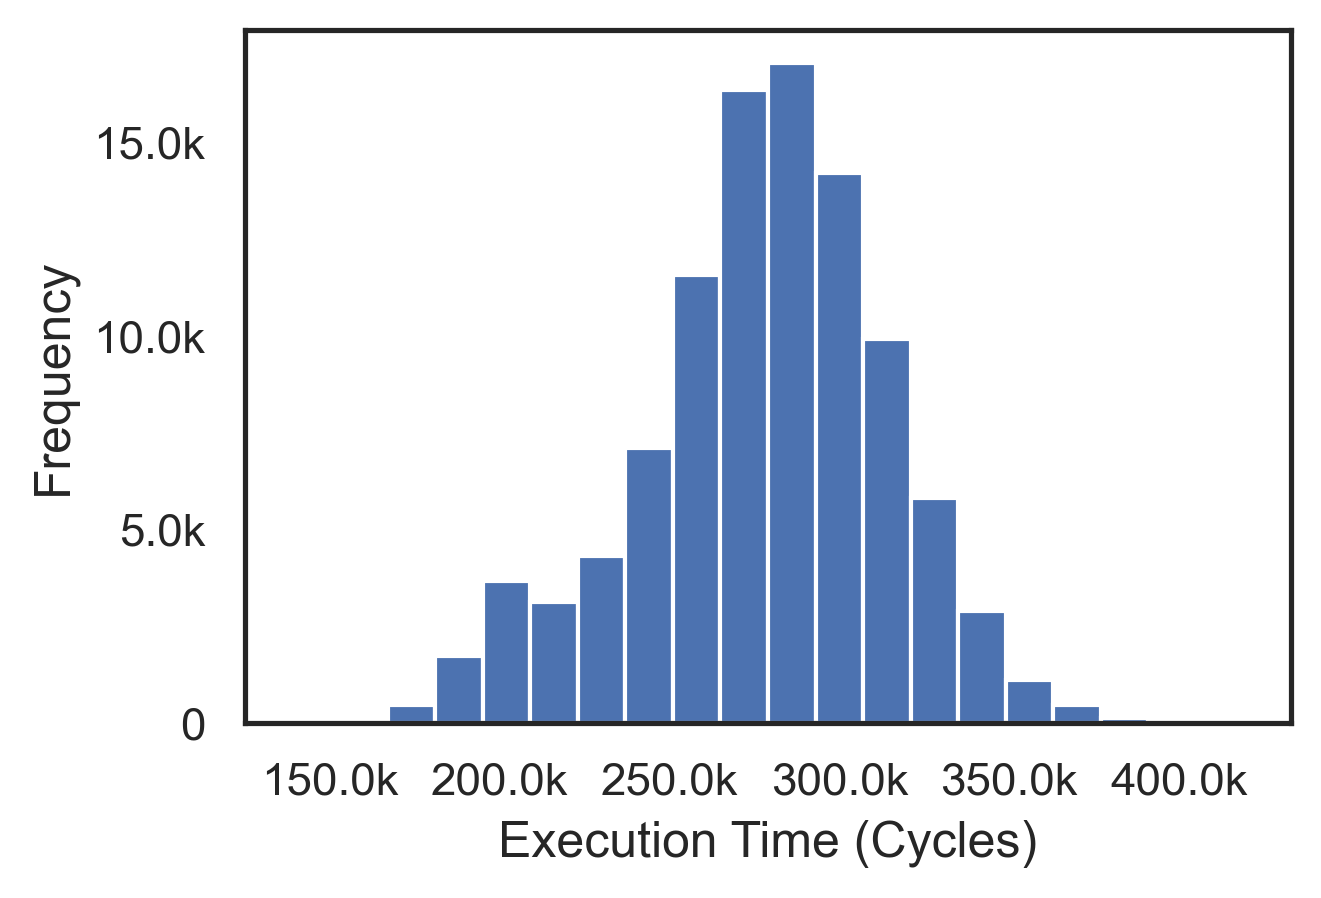

In [18]:
from probsafety import utils
import matplotlib.ticker as mticker

data = utils.load_timing_measurements('../data/picojpeg-emnist.json')[1:]
print(len(data))
plt.hist(data, bins=20)
plt.xlabel("Execution Time (Cycles)")
plt.ylabel("Frequency")
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else (f'{x/1e3:.1f}k' if x >= 1e3 else f'{x:.0f}')))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(
    lambda x, pos: f'{x/1e6:.1f}M' if x >= 1e6 else (f'{x/1e3:.1f}k' if x >= 1e3 else f'{x:.0f}')))
if saving:
    plt.savefig('picojpeg.pdf', bbox_inches = "tight")
plt.show()

F1 {'mode': 'synthetic', 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


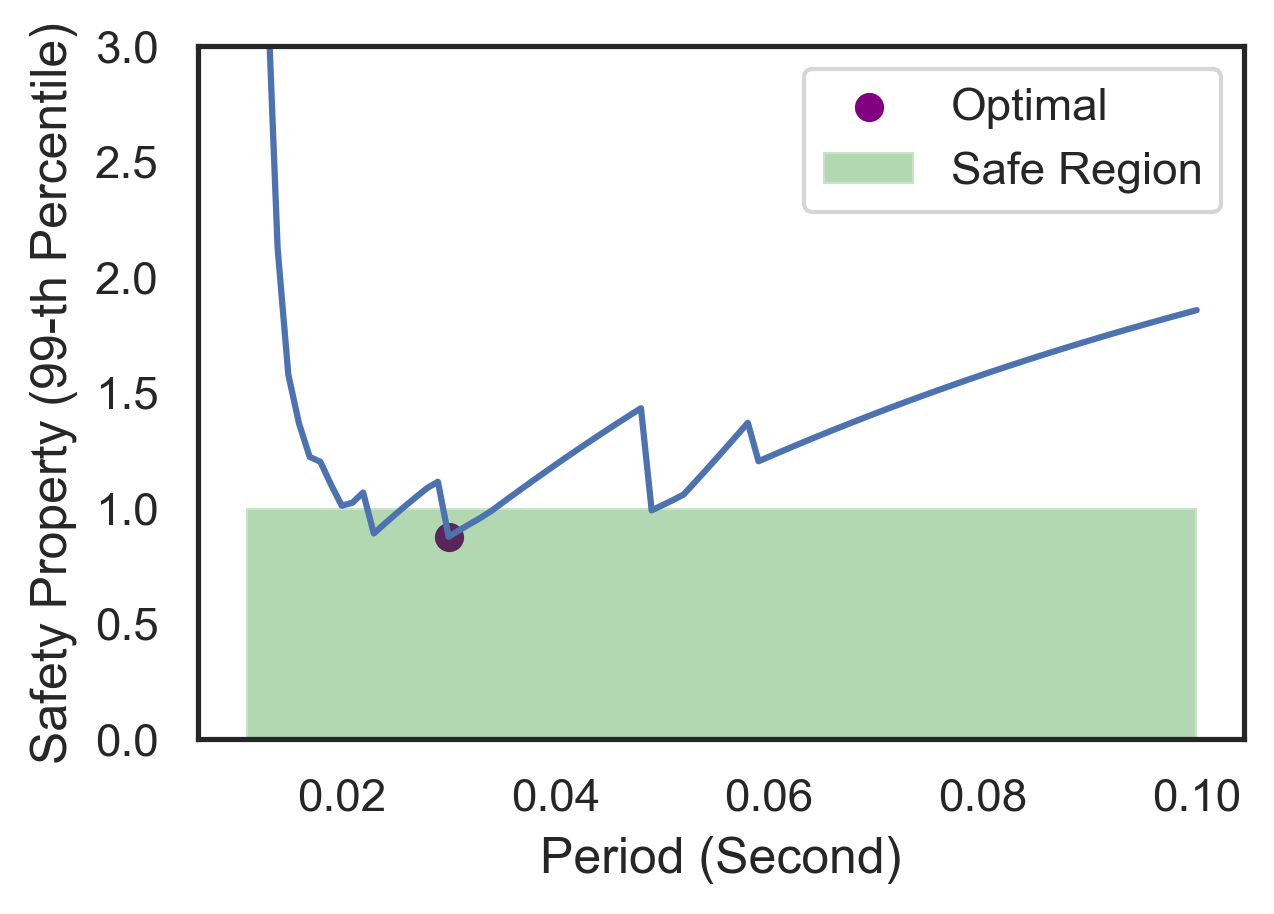

In [13]:
df, cf = load_job_id('1dscan_20241115_1213')
df = df.loc[df['period'] <= 0.1]
df = df.loc[df.groupby('hit_chance')['period'].idxmin()]

plt.plot(
    df['period'],
    df['p99'],
    label='_nolegend_'
)
row = df.loc[df['p99'].idxmin()]
plt.scatter(
    [row['period']],
    [row['p99']],
    color='purple',
)
plt.fill_between(
    df['period'],
    1.0,
    alpha=0.3,
    facecolor='green',
)
# plt.xlim(0, 0.1)
plt.ylim(0, 3)
plt.xlabel('Period (Second)')
plt.ylabel("Safety Property (99-th Percentile)")
plt.legend(['Optimal', 'Safe Region'])
# plt.legend(['Safe Region'])
if saving:
    plt.savefig('period_s.pdf', bbox_inches='tight')
plt.show()

In [14]:
df.loc[df['p99'].idxmin()]

hit_chance    0.806490
period        0.030000
p99           0.874597
p99_lower     0.874597
p99_upper     0.874597
Name: 16, dtype: float64

F1 {'mode': 'measurement', 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 5000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}
hit_chance    0.992680
period        0.072000
p99           0.788606
p99_lower     0.788606
p99_upper     0.788606
Name: 26, dtype: float64
hit_chance    1.000000
period        0.084000
p99           0.926959
p99_lower     0.926959
p99_upper     0.926959
Name: 37, dtype: float64


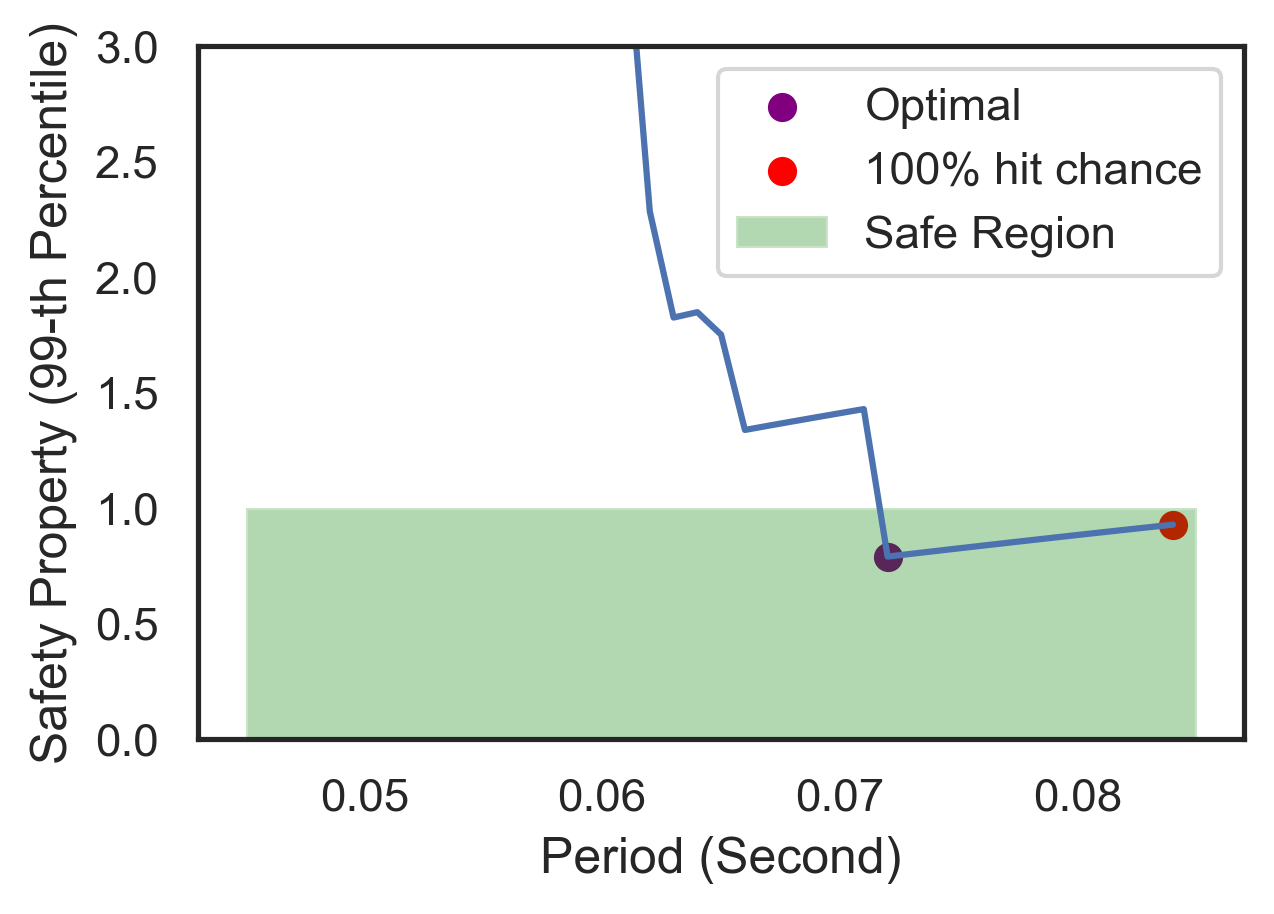

In [29]:
df, cf = load_job_id('1dscan_20241115_1222')
df = df.loc[df['period'] <= 0.1]
df = df.loc[df.groupby('hit_chance')['period'].idxmin()]

plt.plot(
    df['period'],
    df['p99'],
    label='_nolegend_'
)
row = df.loc[df['p99'].idxmin()]
plt.scatter(
    [row['period']],
    [row['p99']],
    color='purple',
)
row = df.loc[df['hit_chance'] == 1].iloc[0]
plt.scatter(
    [row['period']],
    [row['p99']],
    color='red',
)
plt.fill_between(
    [0.045, 0.085],
    1.0,
    alpha=0.3,
    facecolor='green',
)
print(df.loc[df['p99'].idxmin()])
print(df.loc[df['hit_chance'] == 1].iloc[0])
# plt.xlim(0, 0.1)
plt.ylim(0, 3)
plt.xlabel('Period (Second)')
plt.ylabel("Safety Property (99-th Percentile)")
plt.legend(['Optimal', '100% hit chance', 'Safe Region'])
# plt.legend(['100% hit chance', 'Safe Region'])
if saving:
    plt.savefig('period_m.pdf', bbox_inches='tight')
plt.show()

F1 {'mode': 'measurement', 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 1000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}
hit_chance      1.000000
period          0.030000
clock_scale    14.000000
p99             0.290102
p99_lower       0.290102
p99_upper       0.290102
clock_speed    14.000000
Name: 110, dtype: float64
hit_chance      0.813738
period          0.030000
clock_scale    10.300000
p99             0.874597
p99_lower       0.874597
p99_upper       0.874597
clock_speed    10.300000
Name: 73, dtype: float64


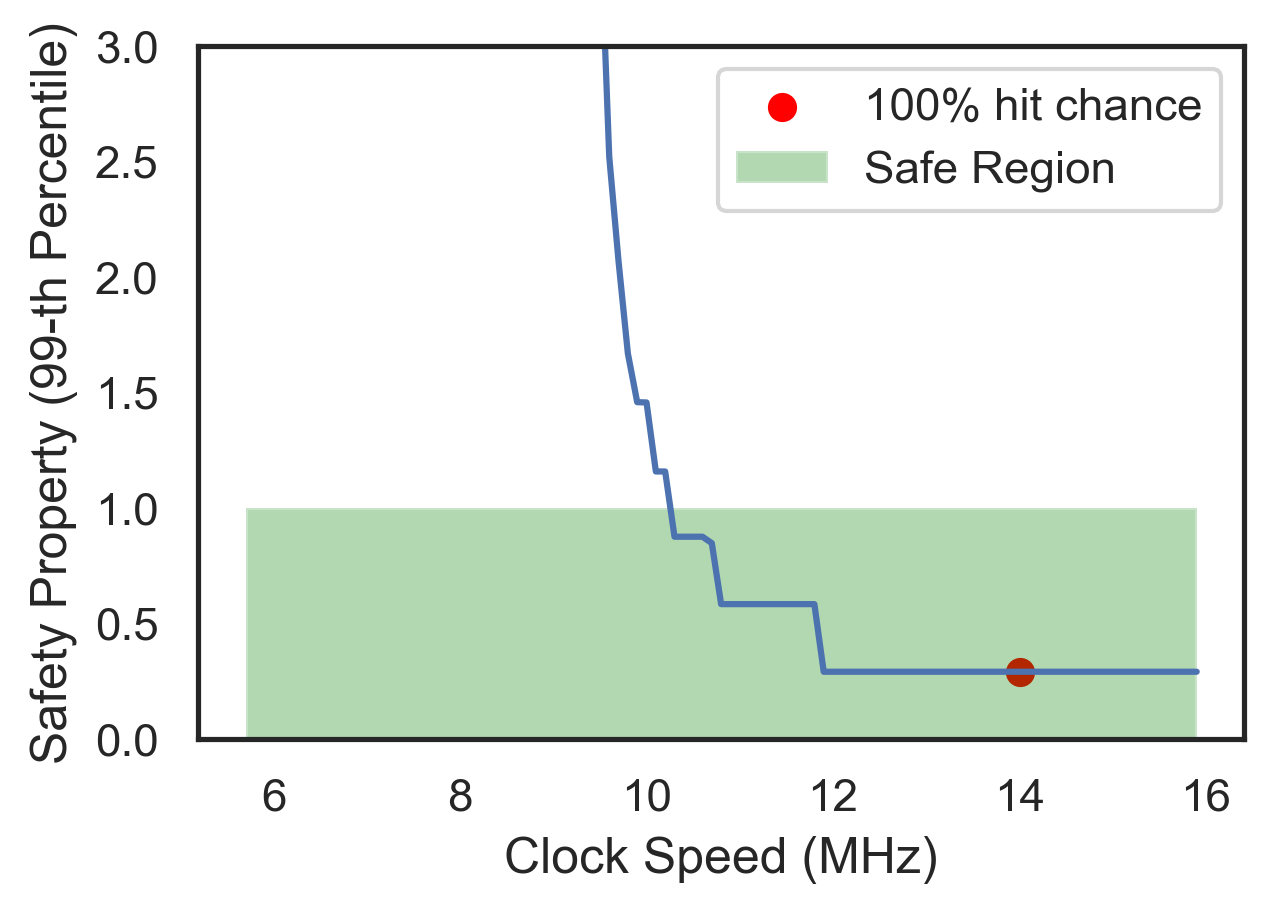

In [16]:
df, cf = load_job_id('1dscan_20241115_1647')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[df['clock_speed'] >= 6]

periods = set(df['period'])

periods = [0.03]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    plt.plot(
        df1['clock_speed'],
        df1['p99'],
        # label=f'Period {p}'
        label='_nolegend_'
    )
    row = df1.loc[df1['hit_chance'] == 1].iloc[0]
    plt.scatter(
        row['clock_speed'],
        row['p99'],
        color='red',
        # label='100% hit chance'
    )
    print(row)
    print(df1.loc[df1['p99'] <= 1].sort_values('clock_speed').iloc[0])
plt.fill_between(
    sorted(df['clock_speed']),
    1.0,
    alpha=0.3,
    facecolor='green',
    # label='Safe Region'
)
plt.ylim(0, 3)
plt.xlabel('Clock Speed (MHz)')
plt.ylabel("Safety Property (99-th Percentile)")
plt.legend(['100% hit chance', 'Safe Region'])
if saving:
    plt.savefig('clock_speeds_m.pdf', bbox_inches='tight')
plt.show()

F1 {'mode': 'synthetic', 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}


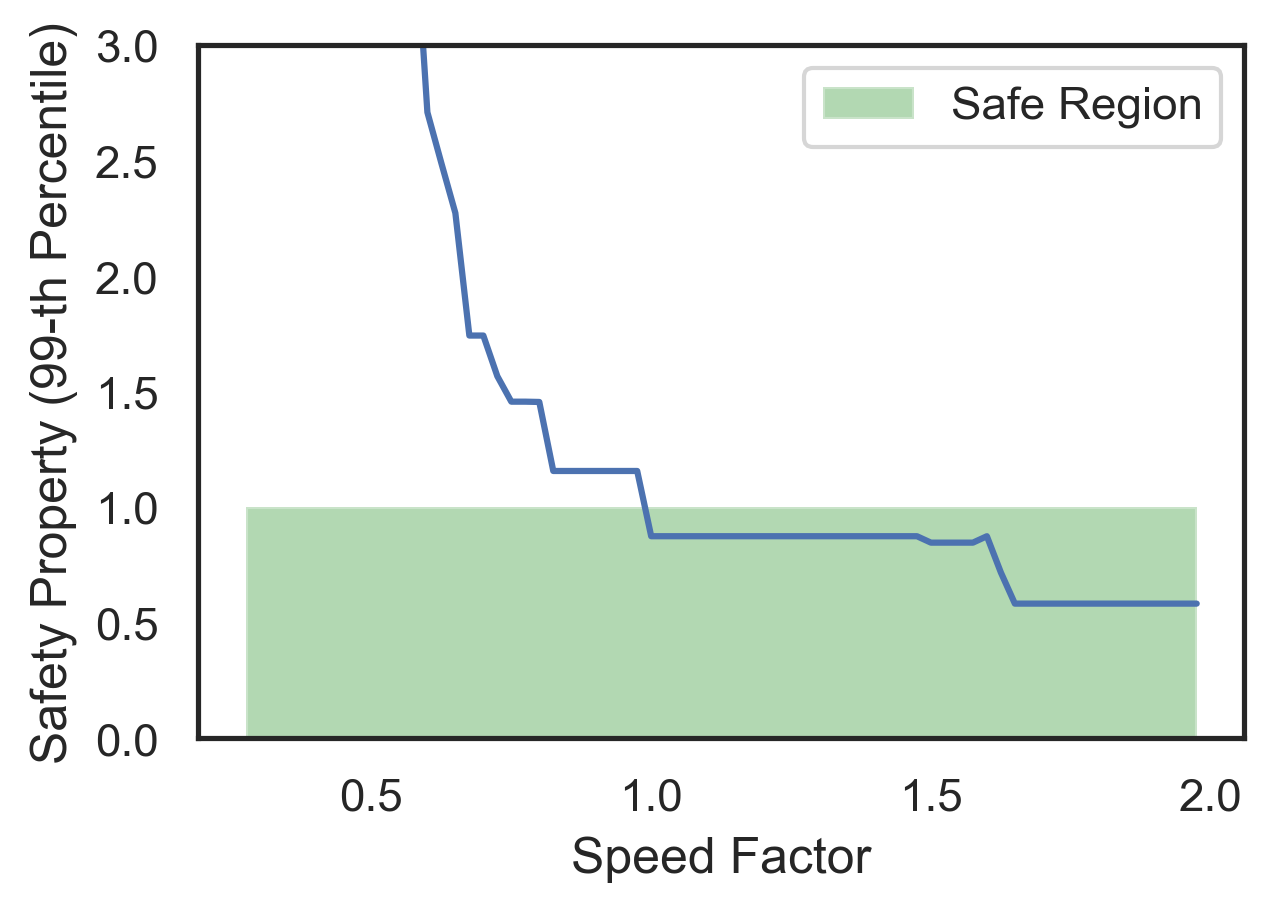

In [17]:
df, cf = load_job_id('1dscan_20241115_1152')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[df['clock_speed'] >= 6]

periods = set(df['period'])

periods = [0.03]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    plt.plot(
        df1['clock_scale'],
        df1['p99'],
        # label=f'Period {p}'
    )
plt.fill_between(
    sorted(df['clock_scale']),
    1.0,
    alpha=0.3,
    facecolor='green',
    label='Safe Region'
)
plt.ylim(0, 3)
plt.xlabel('Speed Factor')
plt.ylabel("Safety Property (99-th Percentile)")
plt.legend()
if saving:
    plt.savefig('clock_speeds_s.pdf', bbox_inches='tight')
plt.show()

F1 {'mode': 'synthetic', 'measurement': {'path': 'data/picojpeg-emnist.json', 'cycles_per_second': 10000000}, 'synthetic': {'sample_size': 100000, 'distribution': 'pareto', 'pareto': {'shape': 1.5, 'scale': 0.01}, 'normal': {'mean': 0.01, 'std': 0.01}}}
hit_chance      0.98945
period          0.21000
clock_scale     1.00000
p99             3.61311
p99_lower       3.61311
p99_upper       3.61311
clock_speed    10.00000
Name: 90, dtype: float64


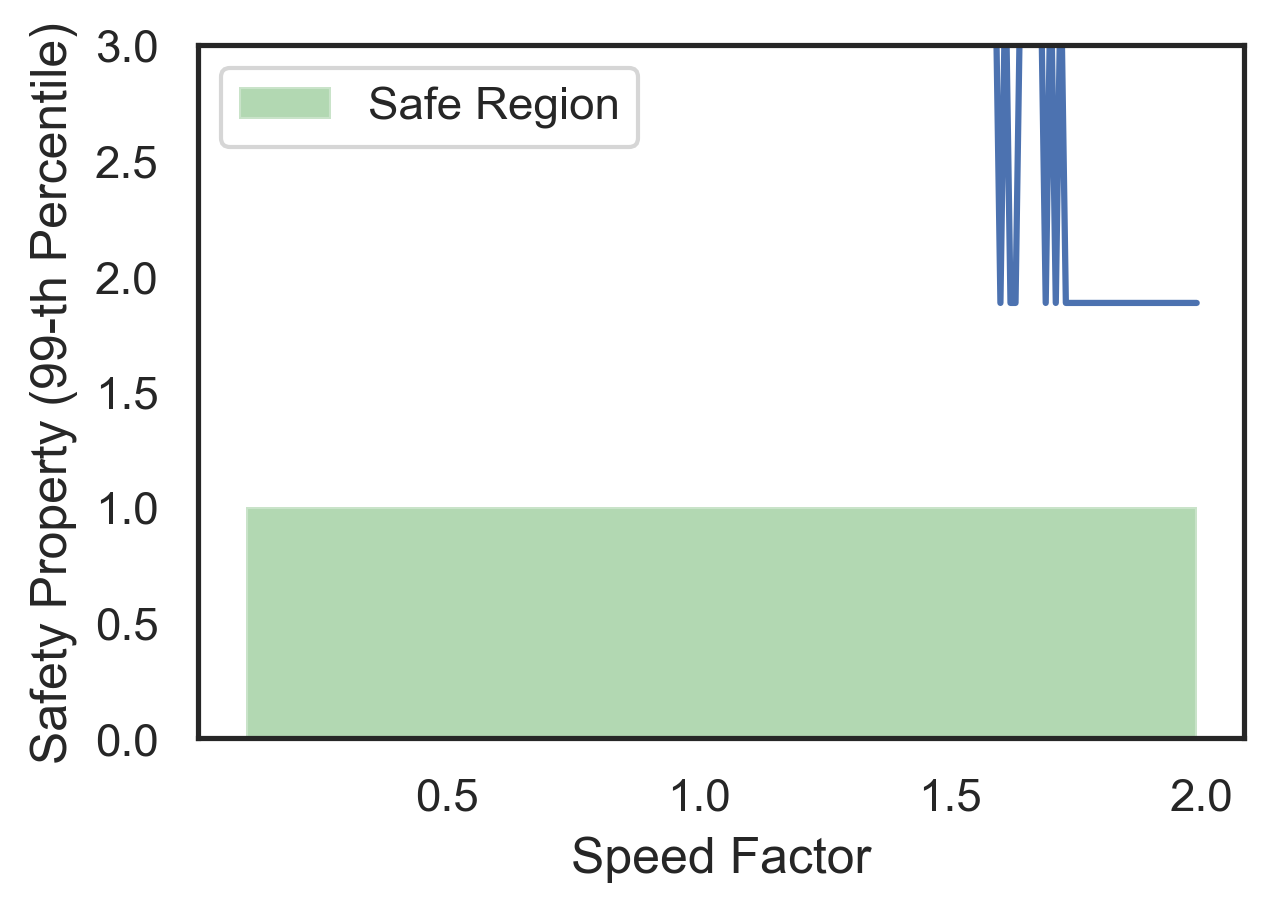

In [30]:
df, cf = load_job_id('1dscan_20241119_1754')
df['clock_speed'] = cf['timing']['measurement']['cycles_per_second'] * df['clock_scale'] / 1e6
# df = df.loc[df['clock_speed'] >= 6]

periods = set(df['period'])

# periods = [0.21]

for p in periods:
    df1 = df.loc[(df['period'] == p)]
    plt.plot(
        df1['clock_scale'],
        df1['p99'],
        # label=f'Period {p}'
    )
plt.fill_between(
    sorted(df['clock_scale']),
    1.0,
    alpha=0.3,
    facecolor='green',
    label='Safe Region'
)
print(df.loc[np.abs(df['clock_scale'] - 1.0).idxmin()])
plt.ylim(0, 3)
plt.xlabel('Speed Factor')
plt.ylabel("Safety Property (99-th Percentile)")
plt.legend()
if saving:
    plt.savefig('clock_speeds_s.pdf', bbox_inches='tight')
plt.show()